# XG-Boost -Extreme Gradient Boosting Machine

It is a optimized implementation of GB.
XGBoost is well known to provide better solutions than other machine learning algorithms. 

## Features of XGBoost:

1)Regularization - XGBoost has option to penalize complex models through both L1 and L2 regularization

2)Parallel Processing - XGBoost implements parallel processing hence faster than GBM. Faster execution speed

3)Handling missing values- XGBoost has inbuilt routine to handle missing values

4)Out of core computing- Uses "out of core" computing for very large datasets that don't fit in the memory. It is memory efficient.

5)Built in cross validation- XGB allows users to run a cross validation at each iteration of the boosting process

XGBoost computes second-order gradients, i.e. second partial derivatives of the loss function, which provides more information about the direction of gradients and how to get to the minimum of our loss function.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
## the boston variable itself is a dictionary, so you can check for its keys using the .keys() method.

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
data = pd.DataFrame(boston.data)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data.columns=boston.feature_names

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
data['PRICE'] = boston.target

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## XGBoost

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally.


Categorical features not supported
Note that XGBoost does not provide specialization for categorical features; if your data contains categorical features, load it as a NumPy array first and then perform corresponding preprocessing steps like one-hot encoding.

In [16]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
import xgboost as xgb

## DMatrix

Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains
Dmatrix is DataMatrix.it is internald data structure used by XGBoost to opitmize memory and speed

In [18]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [19]:
data_dmatrix

## XGBoost Hyperparameters

https://xgboost.readthedocs.io/en/latest/parameter.html #general-parameters

1)booster [default=gbtree]
Select the type of model to run at each iteration. It has 2 options:
gbtree , dart : tree-based models
gblinear: linear models


Though there are 2 types of boosters, we cosider tree booster here because it always outperforms the linear booster and thus the later is rarely used


2)learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
eta [default=0.3]
Analogous to learning rate in GBM
Makes the model more robust by shrinking the weights on each step
Typical final values to be used: 0.01-0.2


3)max_depth: determines how deeply each tree is allowed to grow during any boosting round.


4)max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
If this is defined, GBM will ignore max_depth.


5)subsample: percentage of samples used per tree. Low value can lead to underfitting.
Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
Typical values: 0.5-1


6)colsample_bytree: percentage of features used per tree. High value can lead to overfitting.


7)n_estimators: number of trees you want to build.


8)objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
def: reg:linear

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

1)gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

2)alpha: L1 regularization on leaf weights. A large value leads to more regularization.

3)lambda: L2 regularization on leaf weights and is smoother than L1 regularization.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## XGBRegressor and XGBClassifier

XGBRegressor is for continuous target/outcome variables. These are often called "regression problems."

XGBClassifier is for categorical target/outcome variables. These are often called "classification problems."

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor


In [22]:
xreg=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [23]:
## give objective='reg:squarederror' to avoid that warning

In [24]:
xreg.fit(X_train,y_train)
prediction = xreg.predict(X_test)

[20:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))

In [27]:
rmse

10.423242807286954

### RMSE for the price prediction came out to be around 10.4 per 1000$.

## k-fold Cross Validation using XGBoost

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once.

XGBoost supports k-fold cross validation via the cv() method.

All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

1)num_boost_round: denotes the number of trees you build (analogous to n_estimators)

2)metrics: tells the evaluation metrics to be watched during CV

3)as_pandas: to return the results in a pandas DataFrame.

4)early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.

5)seed: for reproducibility of results.


In [28]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [29]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
## cv_results contains train and test RMSE metrics for each boosting round

In [31]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765523,0.028850
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118633,18.157336,0.116038
3,16.458958,0.169189,16.623974,0.191414
4,15.074782,0.183546,15.254608,0.213612


In [32]:
cv_results["test-rmse-mean"].tail(1)

49    3.99692
Name: test-rmse-mean, dtype: float64

### RMSE for the price prediction has reduced as compared to last time(10.4 per 1000 ) and came out to be around 4.03 per 1000 dollars


### You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

In [43]:
from sklearn.model_selection  import GridSearchCV

In [53]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

optimized_GBM = GridSearchCV(xreg, 
                            parameters, 
                             n_jobs = 5,
                        verbose=True) 

In [54]:
optimized_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:   22.5s finished


[20:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.3, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=10, n_jobs=0,
                                    num_parallel_tre...
                                    random_state=0, reg_alpha=10, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=5,

In [56]:
print(optimized_GBM.best_score_)


0.8881419354554119


In [57]:
print(optimized_GBM.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


## Visualize Boosting Trees

XGBoost has a plot_tree() function.
Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [33]:
xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[20:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


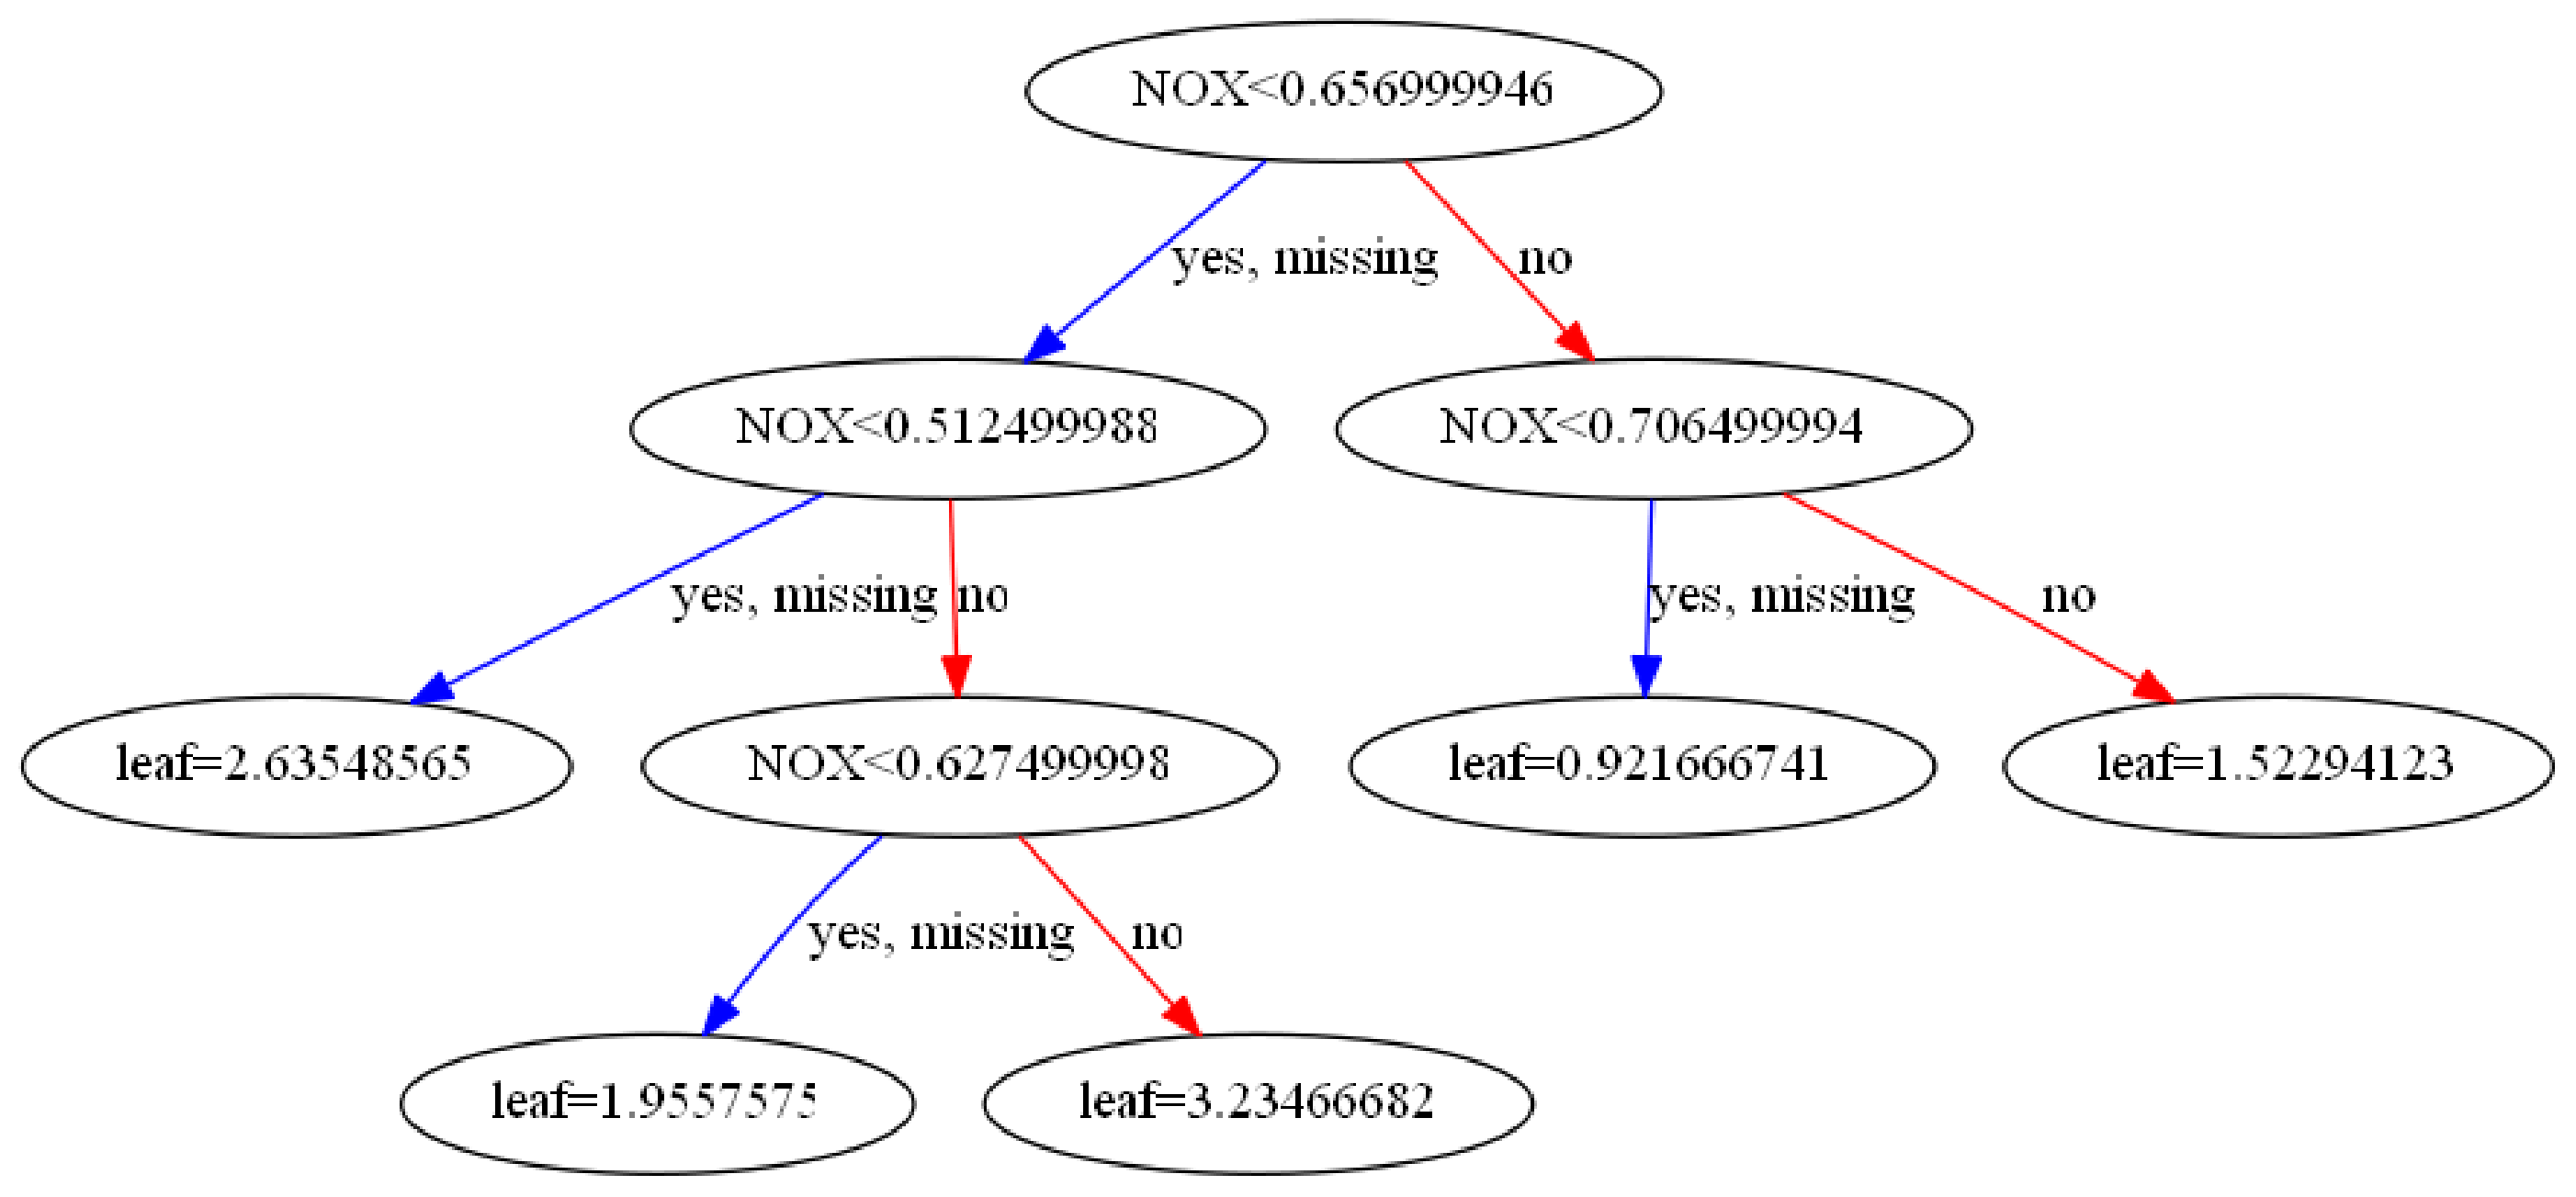

In [38]:
import matplotlib.pyplot as plt
xgb.plot_tree(xreg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [35]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



## Visualize  Feature Importance

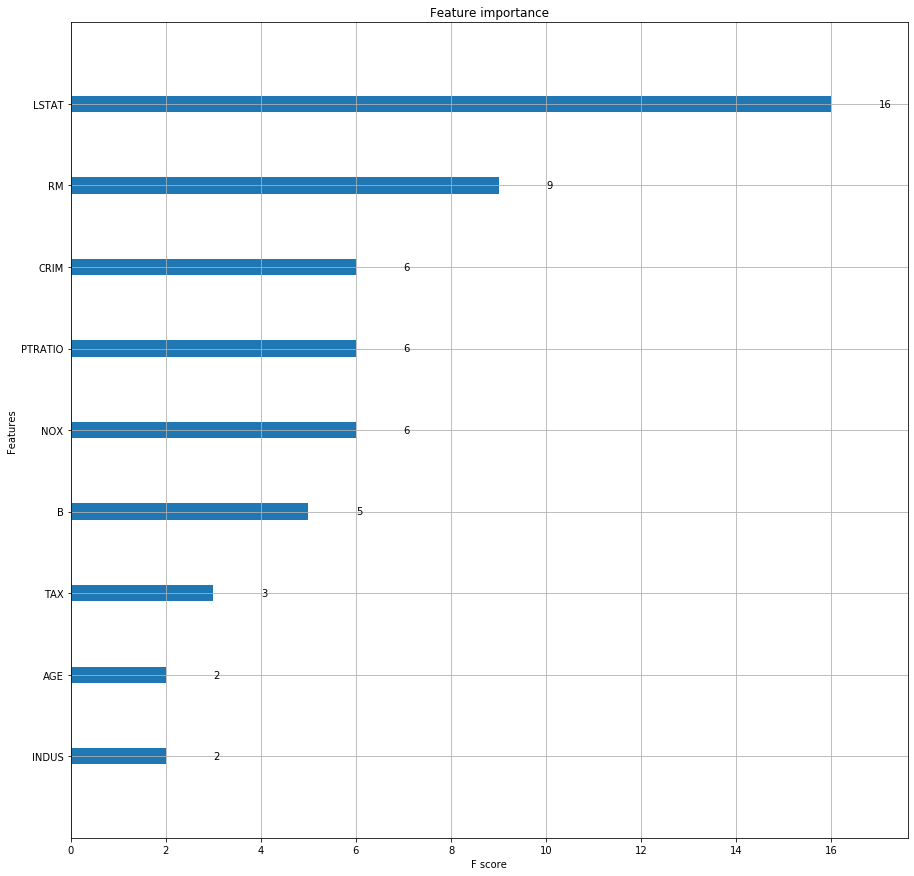

In [41]:
xgb.plot_importance(xreg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

the feature Lstat has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection.